In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
from sklearn.datasets import load_boston
house_price=load_boston()

In [3]:
# converting the dataset into a dataframe
df=pd.DataFrame(house_price.data,columns=house_price.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
df['PRICE'] = house_price.target

In [6]:
# splitting the dataset into training and test sets with 7:3 ratio along with randomly shuffling
X_train, X_test, y_train, y_test = train_test_split(df, df['PRICE'], test_size=0.30, random_state=42)

In [7]:
# checking the shapes of the formed training and tests sets
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(354, 14)
(152, 14)
(152,)
(354,)


In [8]:
# deleting the Price Column from the training part as it is the Output variable
del X_train['PRICE']
X_train.shape
del X_test['PRICE']
X_test.shape

(152, 13)

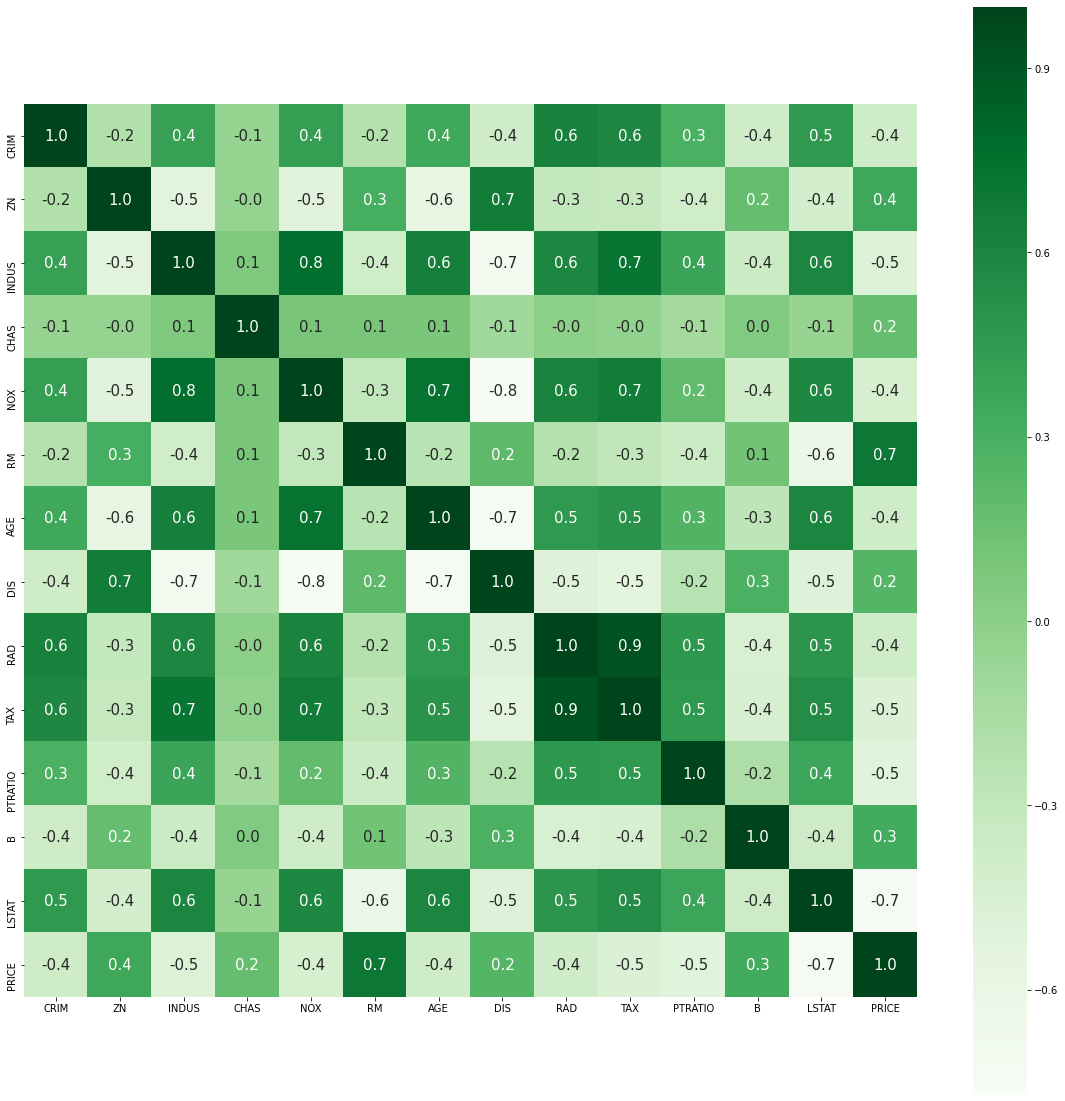

In [9]:
# corelation map
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [10]:
# normal linear REgression
reg=LinearRegression().fit(X_train,y_train)

In [11]:
print(reg.coef_)
print("The intercept values",reg.intercept_)

[-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
The intercept values 31.63108403569186


In [12]:
predictor_variables=X_train.columns
predictor_variables

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

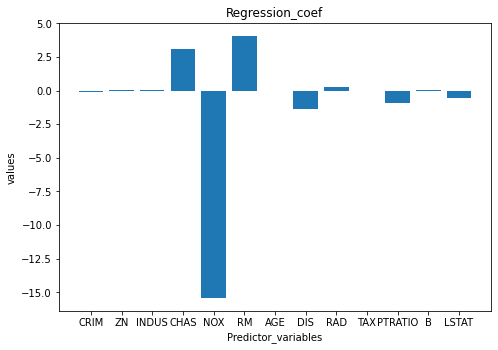

In [13]:
# plotting the BAR Graphs for the independent variables and their regression coefficients
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(predictor_variables,reg.coef_)
plt.title('Regression_coef')
plt.ylabel('values')
plt.xlabel('Predictor_variables')
plt.show()

In [14]:
# here predicting the residuals for the normal regression model.
predictionlr=reg.predict(X_train)

In [15]:
residuals=(y_train-predictionlr)

In [16]:
residuals_mean=np.mean(np.abs(residuals))
type(residuals)
lst=list(range(0,len(residuals)))

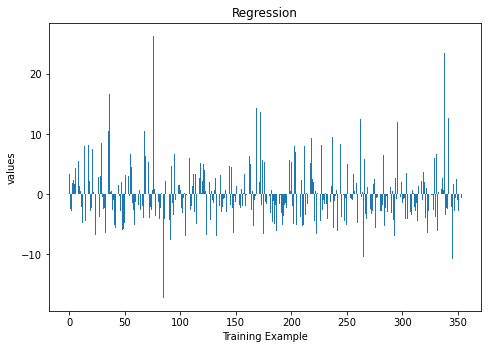

In [17]:
#plotting the graph for the residuals.
fig=plt.figure()
graph=fig.add_axes([0,0,1,1])
graph.bar(lst,residuals)
plt.title('Regression')
plt.ylabel('values')
plt.xlabel('Training Example')
plt.show()

In [18]:
print('R^2:',metrics.r2_score(y_train, predictionlr))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, predictionlr))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, predictionlr))
print('MSE:',metrics.mean_squared_error(y_train, predictionlr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, predictionlr)))

R^2: 0.7434997532004697
Adjusted R^2: 0.7336923908228405
MAE: 3.3568267821682007
MSE: 22.545481487421426
RMSE: 4.748208239685937


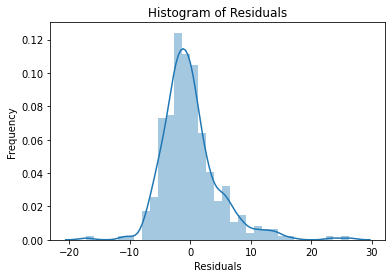

In [19]:
# Checking Normality of errors
sns.distplot(y_train-predictionlr)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [20]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7112260057484903
Adjusted R^2: 0.6840226584639277
MAE: 3.1627098714574253
MSE: 21.517444231177432
RMSE: 4.6386899261728445
